In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, \
                            roc_auc_score, roc_curve, \
                            confusion_matrix

from sklearn.model_selection import train_test_split


# PIPELINE STUFF

### Recommendations

❗Bear in mind that the dataset is imbalanced. 

❗Note that the dataset contains time dependencies so you will have to be careful on how to split your dataset for training and validation of the model (hint, hint: sorting on the timestamp sorts on time)

❗You may have categorical variables with high cardinality. 

❗There are categorical values that may exist in the test set, but not in the train set. You’ll need to be clever in how you deal with this. 

❗If at any moment if looks like your computer is about to fly, you might find useful to work with samples. You may also find that heavier operations may take really long (or even crash your machine) on such a big dataset, so be smart about how your use your resources.

❗Remember: “weeks of programming can save hours of planning”, so work with your team to plan and distribute work before diving in! 

❗Focus on feature engineering and data understanding/exploration, which type of features you can build to characterize user past behavior.

❗Make sure that you get to and submit a baseline ASAP! Then work on improving it.


#1. GET DATA

#2. DATA ANALYSIS AND PREPARATION


#2.1 DATA ANALYSIS

#2.2 DEALING WITH DATA PROBLEMS

#2.3 FEATURE ENGINEERING

#2.4 FEATURE SELECTION

#3. TRAIN MODEL

#4. EVALUATE RESULTS

# #1. GET DATA

In [2]:
df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

!ls data/

sample_submission.csv test.csv              train.csv


In [3]:
train_df = df.copy()

In [4]:
train_df.columns

Index(['ID', 'DATE_DEPARTURE_UTC', 'DATE_ARRIVAL_UTC', 'DATE_DEPARTURE_LCL',
       'DATE_ARRIVAL_LCL', 'ORIGIN', 'ORIGIN_AIRPORT_ID', 'DEST',
       'DEST_AIRPORT_ID', 'TAIL_NUM', 'OP_CARRIER', 'OP_CARRIER_AIRLINE_ID',
       'OP_CARRIER_FL_NUM', 'DISTANCE', 'CANCELLED', 'DEP_DEL15', 'ARR_DEL15'],
      dtype='object')

# #2. DATA ANALYSIS AND PREPARATION

## #2.1 DATA ANALYSIS

In [5]:
train_df.shape

(419487, 17)

In [6]:
train_df.describe()

,ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15,ARR_DEL15
count,419487.000000,419487.000000,419487.000000,419487.000000,419487.000000,401869.000000,419487.0,272667.000000,419487.000000
mean,212639.517973,12656.739730,12655.545597,19993.369749,2628.837404,803.586898,0.0,0.147227,0.148264
std,123449.043509,1525.037067,1524.512434,375.543815,1825.643818,589.887296,0.0,0.354333,0.355362
min,0.000000,10135.000000,10135.000000,19393.000000,1.000000,31.000000,0.0,0.000000,0.000000
25%,105540.500000,11292.000000,11292.000000,19790.000000,1073.000000,370.000000,0.0,0.000000,0.000000
50%,212787.000000,12889.000000,12889.000000,19977.000000,2184.000000,645.000000,0.0,0.000000,0.000000
75%,319018.500000,14027.000000,14027.000000,20378.000000,4115.000000,1045.000000,0.0,0.000000,0.000000
max,435681.000000,16869.000000,16869.000000,20452.000000,6799.000000,5095.000000,0.0,1.000000,1.000000


In [7]:
train_df["DEP_DEL15"].value_counts()

0.0    232523
1.0     40144
Name: DEP_DEL15, dtype: int64

In [8]:
test_df.head()

,ID,DATE_DEPARTURE_UTC,DATE_ARRIVAL_UTC,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN,ORIGIN_AIRPORT_ID,DEST,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15
0,425552,2020-01-23 01:26:00,2020-01-23 02:52:00,2020-01-22 20:26:00,2020-01-22 21:52:00,LGA,12953,BGR,10581,N8894A,9E,20363,5032,378.0,0,NaN
1,415418,2020-01-23 01:26:00,2020-01-23 03:04:00,2020-01-22 19:26:00,2020-01-22 22:04:00,MDW,13232,PHL,14100,N8615E,WN,19393,1168,668.0,0,NaN
2,414222,2020-01-23 01:26:00,2020-01-23 03:06:00,2020-01-22 18:26:00,2020-01-22 19:06:00,DEN,11292,LAS,12889,N7853B,WN,19393,799,628.0,0,NaN
3,421432,2020-01-23 01:26:00,2020-01-23 02:48:00,2020-01-22 17:26:00,2020-01-22 18:48:00,SJC,14831,SAN,14679,N7812G,WN,19393,4454,417.0,0,0.0
4,421356,2020-01-23 01:26:00,2020-01-23 02:24:00,2020-01-22 17:26:00,2020-01-22 18:24:00,SJC,14831,BUR,10800,N7859B,WN,19393,2024,296.0,0,NaN


## #2.2 DEALING WITH DATA PROBLEMS

Nan values

In [9]:
train_df.dtypes

ID                         int64
DATE_DEPARTURE_UTC        object
DATE_ARRIVAL_UTC          object
DATE_DEPARTURE_LCL        object
DATE_ARRIVAL_LCL          object
ORIGIN                    object
ORIGIN_AIRPORT_ID          int64
DEST                      object
DEST_AIRPORT_ID            int64
TAIL_NUM                  object
OP_CARRIER                object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER_FL_NUM          int64
DISTANCE                 float64
CANCELLED                  int64
DEP_DEL15                float64
ARR_DEL15                  int64
dtype: object

In [10]:
train_df.head()
train_df["DEP_DEL15"].isnull().sum()

146820

In [11]:
train_df.head()

,ID,DATE_DEPARTURE_UTC,DATE_ARRIVAL_UTC,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN,ORIGIN_AIRPORT_ID,DEST,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,DEP_DEL15,ARR_DEL15
0,345355,2020-01-18 22:10:00,2020-01-18 23:59:00,2020-01-18 15:10:00,2020-01-18 15:59:00,SLC,14869,SNA,14908,N128DU,DL,19790,1056,588.0,0,0.0,0
1,323447,2020-01-17 21:47:00,2020-01-18 04:10:00,2020-01-17 16:47:00,2020-01-17 20:10:00,BOS,10721,SEA,14747,N486AS,AS,19930,15,2496.0,0,NaN,0
2,242237,2020-01-13 13:26:00,2020-01-13 14:26:00,2020-01-13 07:26:00,2020-01-13 08:26:00,DAL,11259,HOU,12191,N901WN,WN,19393,3,239.0,0,NaN,0
3,271408,2020-01-15 02:45:00,2020-01-15 03:37:00,2020-01-14 20:45:00,2020-01-14 21:37:00,STL,15016,DSM,11423,N778SW,WN,19393,1588,259.0,0,0.0,0
4,282447,2020-01-15 23:22:00,2020-01-16 00:49:00,2020-01-15 18:22:00,2020-01-15 19:49:00,CLT,11057,CHS,10994,N579NN,OH,20397,5207,168.0,0,NaN,1


In [12]:
train_df.groupby('DEP_DEL15').sum()

,ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,DISTANCE,CANCELLED,ARR_DEL15
DEP_DEL15,,,,,,,,
0.0,49744780941,2943315807,2942540062,4647713775,606709870,177990774.0,0,9968
1.0,8241947501,508064722,508484615,803734318,109647459,32125680.0,0,30459


In [13]:
#DROP COLUMNS THAT HAVE OTHER COLUMNS WITH CORRESPONDING UNIQUE IDs
train_df = train_df.drop(columns = [ 
    "ID",
    "ORIGIN",
    "DEST",
    "OP_CARRIER",
    "OP_CARRIER_FL_NUM",
    "CANCELLED",
    "DATE_DEPARTURE_UTC",
    "DATE_ARRIVAL_UTC"
])  

#DROP IRRELEVANT COLUMNS
#MAYBE "OP_CARRIER_FL_NUM" as it could be irrelevant
# FOR LATER IMPROVEMENT

#IF THE FLIGHT HAS BEEN CANCELLED IT DOESN'T COUNT FOR THE MODEL!
# but there are no cancelled flight in the train set so drop this column
train_df.head(3)

,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER_AIRLINE_ID,DISTANCE,DEP_DEL15,ARR_DEL15
0,2020-01-18 15:10:00,2020-01-18 15:59:00,14869,14908,N128DU,19790,588.0,0.0,0
1,2020-01-17 16:47:00,2020-01-17 20:10:00,10721,14747,N486AS,19930,2496.0,NaN,0
2,2020-01-13 07:26:00,2020-01-13 08:26:00,11259,12191,N901WN,19393,239.0,NaN,0


In [14]:
train_no_drops_df = train_df

print(f"Before: {train_df.shape[0]}")
train_df = train_df.dropna(subset=['DEP_DEL15'])
print(f"After: {train_df.shape[0]}")

Before: 419487
After: 272667


Sorting by `timestamp`

In [31]:
train_df.reset_index()
train_df = train_df.sort_values("DATE_DEPARTURE_LCL")
train_df.head(3)

,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER_AIRLINE_ID,DISTANCE,DEP_DEL15,ARR_DEL15,DAY_ARRIVAL_LCL,HOUR_ARRIVAL_LCL,WEEK_DAY_ARRIVAL_LCL,DAY_DEPARTURE_LCL,HOUR_DEPARTURE_LCL,WEEK_DAY_DEPARTURE_LCL
280355,2020-01-01 00:01:00,2020-01-01 00:45:00,14107,15376,N243LR,20378,110.0,0.0,0,2020-01-01,0,Wed,2020-01-01,0,Wed
410769,2020-01-01 00:05:00,2020-01-01 01:05:00,10397,13342,N909DE,19790,669.0,1.0,1,2020-01-01,1,Wed,2020-01-01,0,Wed
340702,2020-01-01 00:05:00,2020-01-01 05:31:00,14107,11057,N181UW,19805,1773.0,0.0,0,2020-01-01,5,Wed,2020-01-01,0,Wed


## #2.3 FEATURE ENGINEERING

### Modifying Columns

Changing the TIMESTAMPS to different columns - DAY and HOUR

In [16]:
#train_df['DATE_DEPARTURE_UTC'] = pd.to_datetime(train_df['DATE_DEPARTURE_UTC'], format="%Y-%m-%d %H:%M:%S" )
train_df['DATE_ARRIVAL_LCL'] = pd.to_datetime(train_df['DATE_ARRIVAL_LCL'], format="%Y-%m-%d %H:%M:%S" )
train_df['DATE_DEPARTURE_LCL'] = pd.to_datetime(train_df['DATE_DEPARTURE_LCL'], format="%Y-%m-%d %H:%M:%S" )

In [17]:
train_df['DATE_DEPARTURE_LCL'].dt.strftime("%Y-%m-%d")

0         2020-01-18
3         2020-01-14
7         2020-01-14
8         2020-01-02
9         2020-01-01
             ...    
419477    2020-01-08
419479    2020-01-03
419482    2020-01-20
419483    2020-01-16
419484    2020-01-19
Name: DATE_DEPARTURE_LCL, Length: 272667, dtype: object

In [18]:
#train_df['DAY_DEPARTURE_UTC'] = train_df['DATE_DEPARTURE_UTC'].dt.strftime("%Y-%m-%d")
#train_df['HOUR_DEPARTURE_UTC'] = train_df['DATE_DEPARTURE_UTC'].dt.strftime("%H").astype(int)

In [19]:
train_df['DAY_ARRIVAL_LCL'] = train_df['DATE_ARRIVAL_LCL'].dt.strftime("%Y-%m-%d")
train_df['HOUR_ARRIVAL_LCL'] = train_df['DATE_ARRIVAL_LCL'].dt.strftime("%H").astype(int)
train_df['WEEK_DAY_ARRIVAL_LCL'] = train_df['DATE_ARRIVAL_LCL'].dt.strftime("%a")

In [20]:
train_df['DAY_DEPARTURE_LCL'] = train_df['DATE_DEPARTURE_LCL'].dt.strftime("%Y-%m-%d")
train_df['HOUR_DEPARTURE_LCL'] = train_df['DATE_DEPARTURE_LCL'].dt.strftime("%H").astype(int)
train_df['WEEK_DAY_DEPARTURE_LCL'] = train_df['DATE_DEPARTURE_LCL'].dt.strftime("%a")

In [21]:
train_df.head()

,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER_AIRLINE_ID,DISTANCE,DEP_DEL15,ARR_DEL15,DAY_ARRIVAL_LCL,HOUR_ARRIVAL_LCL,WEEK_DAY_ARRIVAL_LCL,DAY_DEPARTURE_LCL,HOUR_DEPARTURE_LCL,WEEK_DAY_DEPARTURE_LCL
0,2020-01-18 15:10:00,2020-01-18 15:59:00,14869,14908,N128DU,19790,588.0,0.0,0,2020-01-18,15,Sat,2020-01-18,15,Sat
3,2020-01-14 20:45:00,2020-01-14 21:37:00,15016,11423,N778SW,19393,259.0,0.0,0,2020-01-14,21,Tue,2020-01-14,20,Tue
7,2020-01-14 10:27:00,2020-01-14 12:40:00,10800,14107,N762SW,19393,369.0,0.0,0,2020-01-14,12,Tue,2020-01-14,10,Tue
8,2020-01-02 11:55:00,2020-01-02 19:31:00,14771,11433,N897DN,19790,2079.0,0.0,0,2020-01-02,19,Thu,2020-01-02,11,Thu
9,2020-01-01 07:43:00,2020-01-01 09:57:00,14831,14747,N552WN,19393,696.0,0.0,0,2020-01-01,9,Wed,2020-01-01,7,Wed


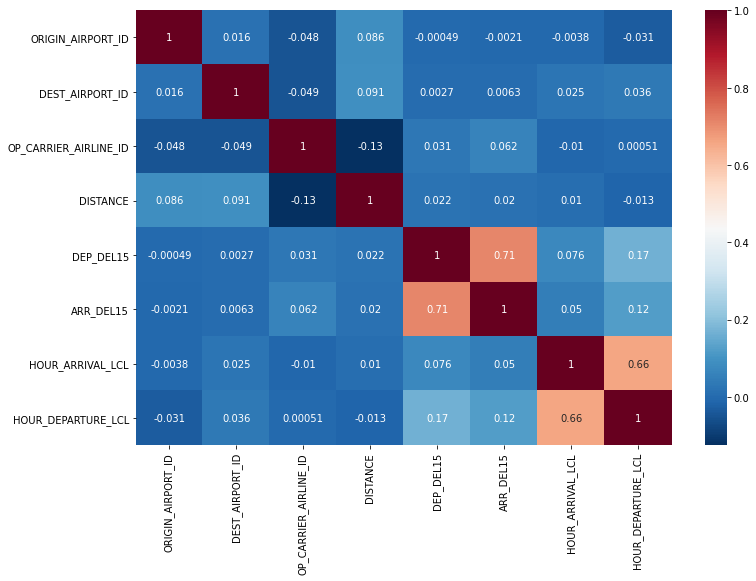

In [32]:
plt.figure(figsize = (12,8))
sns.heatmap(train_df.corr(), 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); 

In [23]:
train_df.head()

,DATE_DEPARTURE_LCL,DATE_ARRIVAL_LCL,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,TAIL_NUM,OP_CARRIER_AIRLINE_ID,DISTANCE,DEP_DEL15,ARR_DEL15,DAY_ARRIVAL_LCL,HOUR_ARRIVAL_LCL,WEEK_DAY_ARRIVAL_LCL,DAY_DEPARTURE_LCL,HOUR_DEPARTURE_LCL,WEEK_DAY_DEPARTURE_LCL
0,2020-01-18 15:10:00,2020-01-18 15:59:00,14869,14908,N128DU,19790,588.0,0.0,0,2020-01-18,15,Sat,2020-01-18,15,Sat
3,2020-01-14 20:45:00,2020-01-14 21:37:00,15016,11423,N778SW,19393,259.0,0.0,0,2020-01-14,21,Tue,2020-01-14,20,Tue
7,2020-01-14 10:27:00,2020-01-14 12:40:00,10800,14107,N762SW,19393,369.0,0.0,0,2020-01-14,12,Tue,2020-01-14,10,Tue
8,2020-01-02 11:55:00,2020-01-02 19:31:00,14771,11433,N897DN,19790,2079.0,0.0,0,2020-01-02,19,Thu,2020-01-02,11,Thu
9,2020-01-01 07:43:00,2020-01-01 09:57:00,14831,14747,N552WN,19393,696.0,0.0,0,2020-01-01,9,Wed,2020-01-01,7,Wed


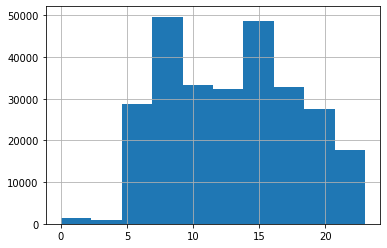

In [36]:
train_df['HOUR_DEPARTURE_LCL'].hist()

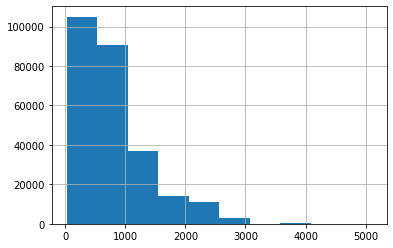

In [34]:
train_df['DISTANCE'].hist()

## #2.4 FEATURE SELECTION

# #3. TRAIN MODEL

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = train_df.drop(columns=['ARR_DEL15'])
y_train = train_df['ARR_DEL15']

NameError: name 'X' is not defined

# #4. EVALUATE RESULTS

# #5 ITERATE